# Predykcja płci po imieniu

In [1]:
import pandas as pd
import numpy as np

#ustwiamy ziarnko (seed), dla powtarzalności w losowaniu
np.random.seed(2018) # <== może być dowolna liczba, ale trzeba wybrać coś... więc rok 2018 :)

#models (algorithms)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#walidacja wyniku
from sklearn.model_selection import train_test_split

#metryka sukcesu
from sklearn.metrics import accuracy_score # <== our success metric

#wizualizacja
import matplotlib.pyplot as plt

# <== umożliwia robić wykresy w notebook'u, zamiast otwierać w oknie
%matplotlib inline 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/toskpl/machine_learning/master/case_name/input/polish_names.csv')

In [3]:
df['target'] = df['gender'].map(lambda x: int(x == 'm'))
df

,name,gender,target
0,Abdon,m,1
1,Abel,m,1
2,Abercjusz,m,1
3,Abraham,m,1
4,Absalon,m,1
5,Achacjusz,m,1
6,Achacy,m,1
7,Achilles,m,1
8,Ada,f,0
9,Adalbert,m,1


In [4]:
def train_and_predict_model(X_train, X_test, y_train, y_test, model, success_metric=accuracy_score):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return success_metric(y_test, y_pred)

## Feature engineering 

Tworzymy nowe cechy na podstawie już istniejących. 

In [5]:
vowels = ['a', 'ą', 'e', 'ę', 'i', 'o', 'u', 'y']

def how_many_vowels(name):
    return sum( map(lambda x: int(x in vowels), name.lower()) )
    
def first_is_vowel(name):
    return name.lower()[0] in vowels

def last_is_vowel(name):
    return name.lower()[-1] in vowels

def get_all_vowels(name):
    all_vowels = [letter for letter in name.lower() if letter in vowels]
    
    return ''.join(all_vowels)

def get_all_consonants(name):
    all_consonants = [letter for letter in name.lower() if letter not in vowels]
    
    return ''.join(all_consonants)

def feature_engineering(df):
    df['len_name'] = df['name'].map(lambda x: len(x))
    
    df['first_is_vowel'] = df['name'].map(first_is_vowel)
    df['last_is_vowel'] = df['name'].map(last_is_vowel)
    
    df['first_letter'] = df['name'].map(lambda x: x.lower()[0])
    df['first_letter_cnt'] = pd.factorize(df['first_letter'])[0]
    
    df['last_letter'] = df['name'].map(lambda x: x.lower()[-1])
    df['last_letter_cnt'] = pd.factorize(df['last_letter'])[0]
    
    df['all_vowels'] = df['name'].map(get_all_vowels)
    df['all_vowels_cnt'] = pd.factorize(df['all_vowels'])[0]

    df['all_consonants'] = df['name'].map(get_all_consonants)
    df['all_consonants_cnt'] = pd.factorize(df['all_consonants'])[0]
    
    
    return df  

In [6]:
df_fe = feature_engineering(df)
df_fe

,name,gender,target,len_name,first_is_vowel,last_is_vowel,first_letter,first_letter_cnt,last_letter,last_letter_cnt,all_vowels,all_vowels_cnt,all_consonants,all_consonants_cnt
0,Abdon,m,1,5,True,False,a,0,n,0,ao,0,bdn,0
1,Abel,m,1,4,True,False,a,0,l,1,ae,1,bl,1
2,Abercjusz,m,1,9,True,False,a,0,z,2,aeu,2,brcjsz,2
3,Abraham,m,1,7,True,False,a,0,m,3,aaa,3,brhm,3
4,Absalon,m,1,7,True,False,a,0,n,0,aao,4,bsln,4
5,Achacjusz,m,1,9,True,False,a,0,z,2,aau,5,chcjsz,5
6,Achacy,m,1,6,True,True,a,0,y,4,aay,6,chc,6
7,Achilles,m,1,8,True,False,a,0,s,5,aie,7,chlls,7
8,Ada,f,0,3,True,True,a,0,a,6,aa,8,d,8
9,Adalbert,m,1,8,True,False,a,0,t,7,aae,9,dlbrt,9


In [50]:
features = ['len_name', 'first_is_vowel', 'last_is_vowel', 'first_letter_cnt', 'last_letter_cnt', 'all_vowels_cnt', 'all_consonants_cnt']
X = df_fe[ features ]
y = df_fe['target']

train_and_predict_model(X, X, y, y, LogisticRegression())

0.9524926686217009

In [35]:
features = ['len_name', 'first_is_vowel', 'first_letter_cnt', 'all_vowels_cnt', 'all_consonants_cnt']
X = df_fe[ features ]
y = df_fe['target']

train_and_predict_model(X, X, y, y, LogisticRegression())

0.6099706744868035

## Train & Test

Podział na zbiór uczący(70%) i uczący (30%).

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2018)
y_train
print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)


Train: (1193, 7) (1193,)
Test: (512, 7) (512,)


In [52]:
train_and_predict_model(X_train, X_test, y_train, y_test, LogisticRegression())

0.962890625

## Krzywe uczenia się


In [53]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(model, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure(figsize=(12,8))
    plt.title(title)
    if ylim is not None:plt.ylim(*ylim)

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

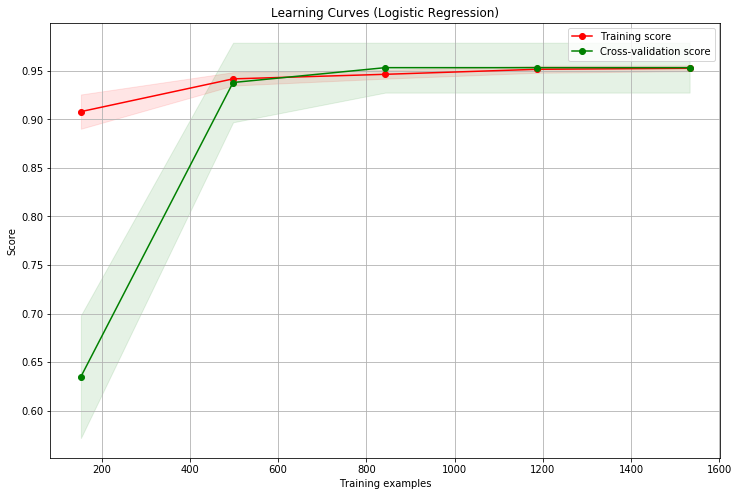

In [54]:
plt = plot_learning_curve(LogisticRegression(), "Learning Curves (Logistic Regression)", X, y, cv=10, n_jobs=4)
plt.show()

W naszym przypadku akurat widać, że mając już 800 imion, jest to całkiem wystarczające.

In [55]:
train_and_predict_model(X_train, X_test, y_train, y_test, DecisionTreeClassifier())

0.982421875

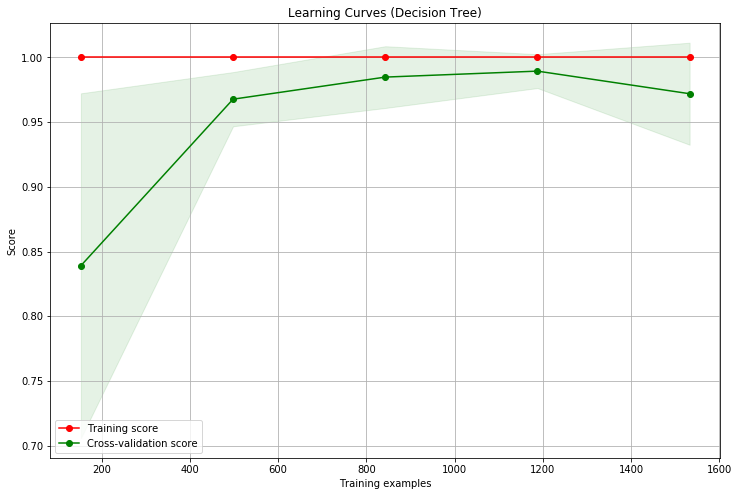

In [56]:
plt = plot_learning_curve(DecisionTreeClassifier(), "Learning Curves (Decision Tree)", X, y, cv=10)
plt.show()

## Ważność cech
Wyciągnięcie informacji o cechach i oznaczenie które z nich są ważne (wg modelu, w tym przypadku drzewa decyzyjnego). 

In [57]:
def draw_feature_importances(model, features):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 5))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), model.feature_importances_[indices],
           color="b", align="center")
    plt.xticks(range(X.shape[1]), [ features[x] for x in indices])
    plt.xticks(rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()

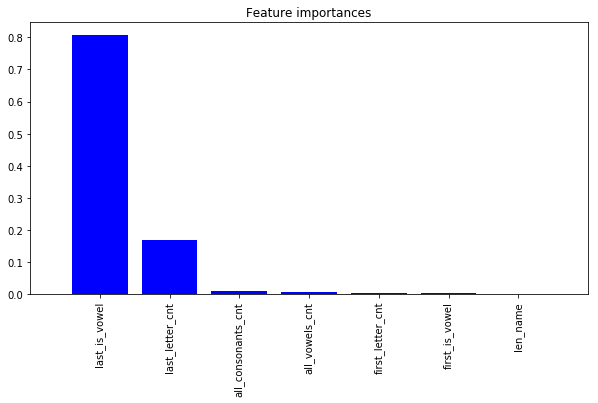

In [58]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

draw_feature_importances(model, features)